In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import OneHotEncoder
from tpot import TPOTRegressor
import vertica_python
import os
import seaborn as sns
import math
from scipy.stats import ttest_ind

In [2]:
sns.set_context("poster", font_scale=1.2)

## Import our data, filter based on enrollments

In [3]:
course_rubric_df = pd.read_csv('./course_rubric_raw.csv', encoding='ISO-8859-1')
course_rubric_df = course_rubric_df[course_rubric_df['Seat type']=='verified']

In [4]:
course_rubric_df = course_rubric_df[course_rubric_df['Enrollments']>1000]

In [7]:
course_rubric_df['Active seq: quartile'].unique()
order_list = [
    '0th - 25th',
    '25th - 50th', 
    '50th - 75th', 
    '75th - 100th'  
]

## Make some plots!

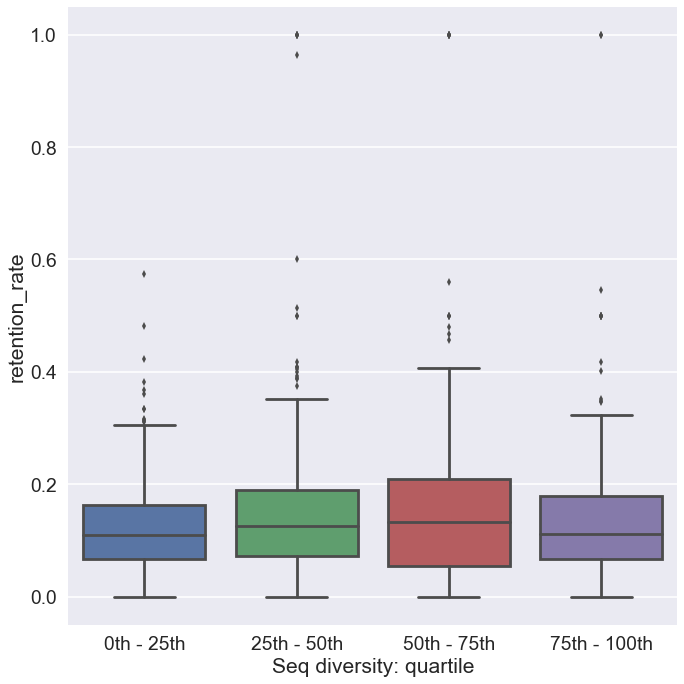

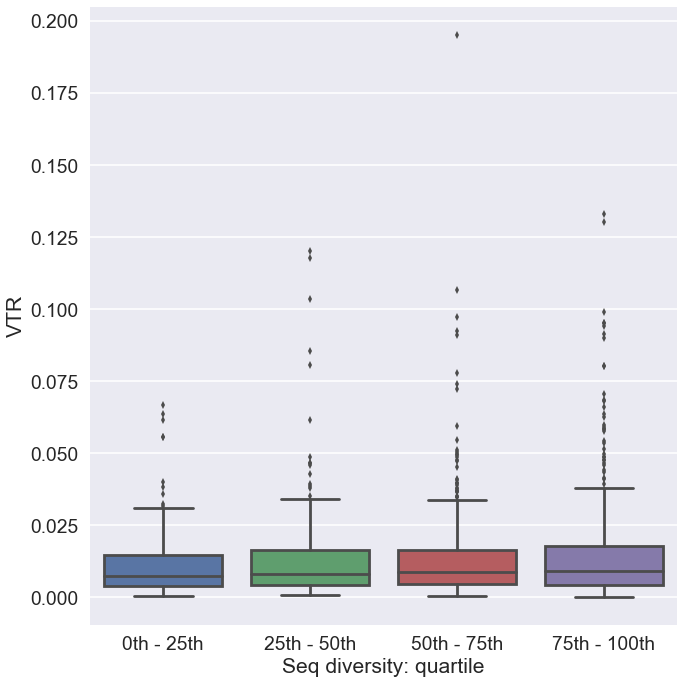

In [9]:
sns.factorplot(data = course_rubric_df, x = 'Seq diversity: quartile', 
               y = 'retention_rate', size = 10, order = order_list, kind = 'box')
sns.factorplot(data = course_rubric_df, x = 'Seq diversity: quartile', 
               y = 'VTR', size = 10, order = order_list, kind = 'box')

## Run t-tests to assess significance

Note: this is bad practice to run multiple paired t-tests. It increases the likelihood of Type I error. But probably fine for this use case

In [93]:
bottom = course_rubric_df[course_rubric_df['Seq diversity: quartile']=='0th - 25th']['VTR'].dropna()
second = course_rubric_df[course_rubric_df['Seq diversity: quartile']=='25th - 50th']['VTR'].dropna()
third = course_rubric_df[course_rubric_df['Seq diversity: quartile']=='50th - 75th']['VTR'].dropna()
top = course_rubric_df[course_rubric_df['Seq diversity: quartile']=='75th - 100th']['VTR'].dropna()

In [96]:
print (ttest_ind(bottom, top))
print (ttest_ind(third, top)) 
print (ttest_ind(second, top)) 

Ttest_indResult(statistic=-3.5188064990566641, pvalue=0.00046194467900946665)
Ttest_indResult(statistic=-1.8604175249092114, pvalue=0.063144343364217148)
Ttest_indResult(statistic=-2.1950562563710476, pvalue=0.028450562402852483)


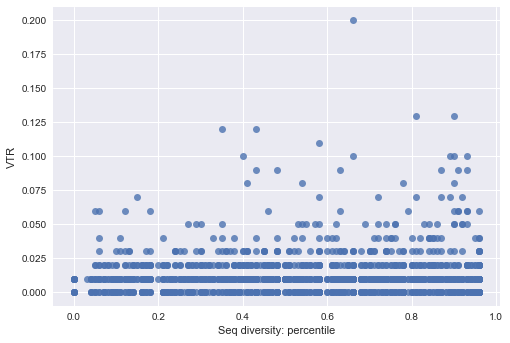

In [106]:
# sns.regplot(data = course_rubric_df[course_rubric_df['Enrollments']>1000], 
#             x = 'Seq diversity: percentile', y = 'VTR', fit_reg=False)

## Stuff to control for
- subject
- level
- pacing
- heterogenous
- seat type(?)
- partner

### STEM subjects

In [11]:
course_rubric_df.Subject.unique()

array([nan, 'Business & Management', 'Electronics', 'Math', 'Engineering',
       'Design', 'Data Analysis & Statistics', 'Biology & Life Sciences',
       'Computer Science', 'Physics', 'Medicine', 'Economics & Finance',
       'Environmental Studies', 'Science', 'Ethics',
       'Energy & Earth Sciences', 'History', 'Social Sciences',
       'Humanities', 'Literature', 'Communication', 'Art & Culture',
       'Philosophy & Ethics', 'Health & Safety', 'Chemistry',
       'Food & Nutrition', 'Music', 'Education & Teacher Training', 'Law',
       'Language', 'Architecture'], dtype=object)

In [13]:
stem_subjects = [
    'Data Analysis & Statistics',
    'Engineering',
    'Business & Management',
    'Computer Science'
]

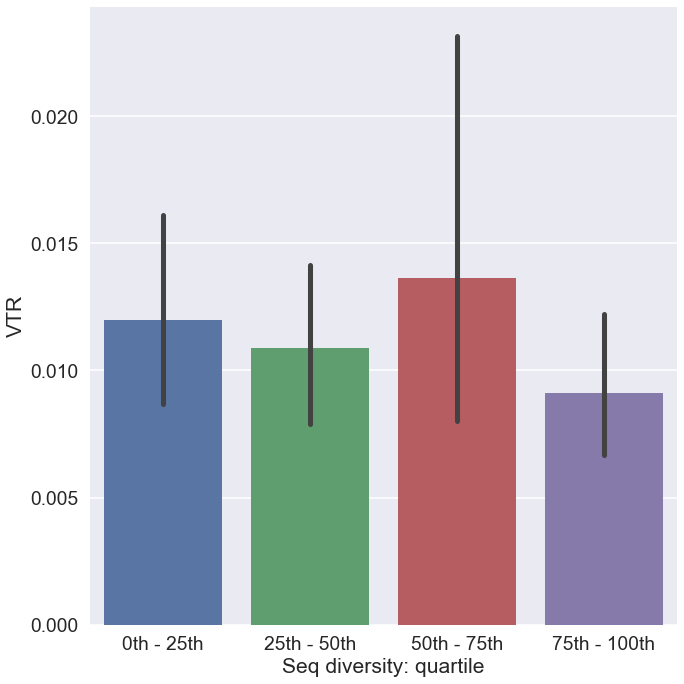

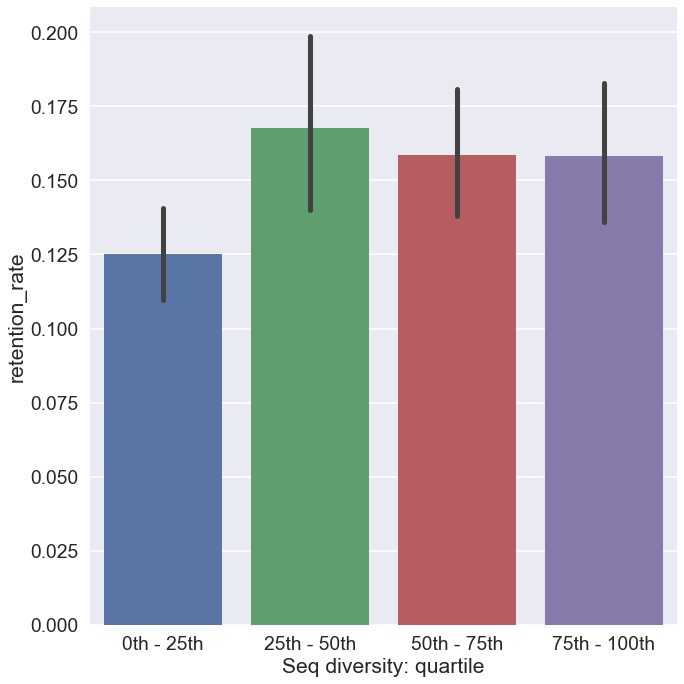

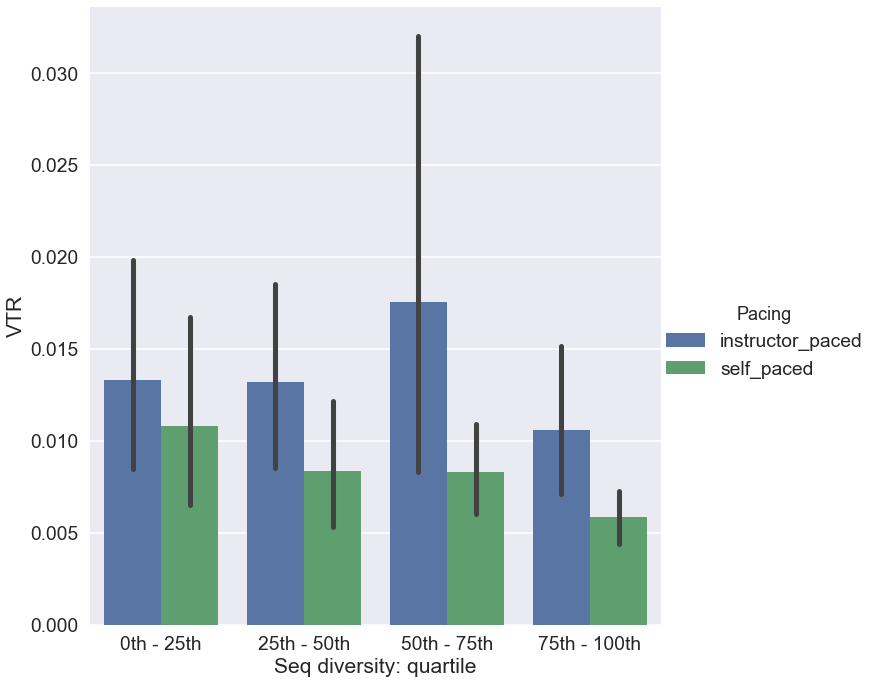

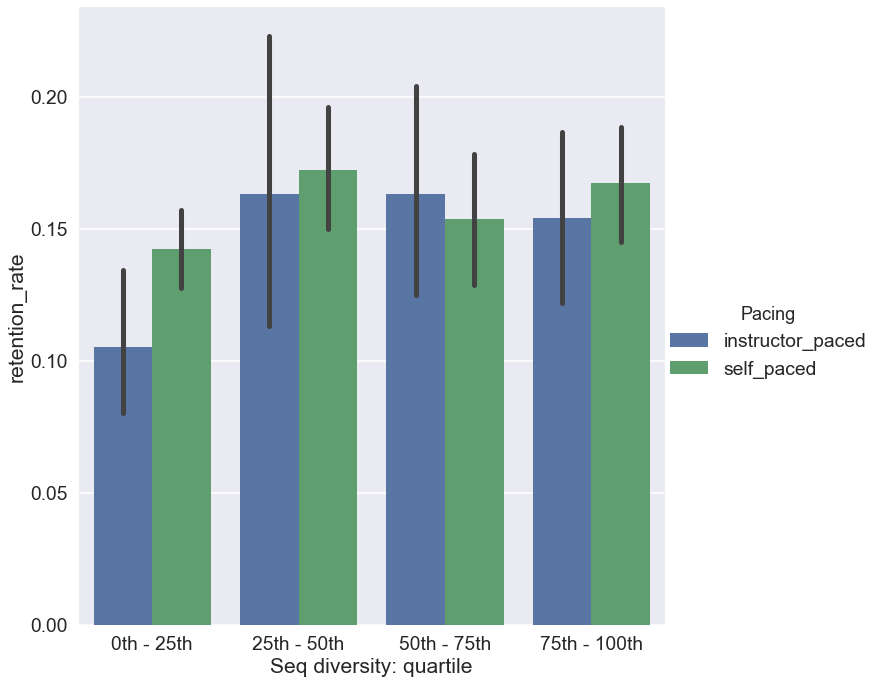

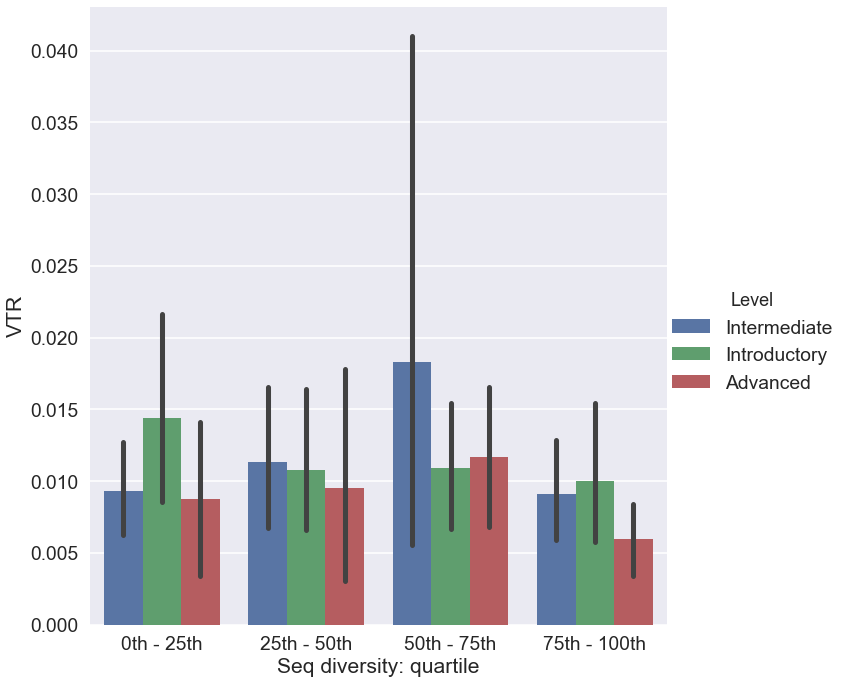

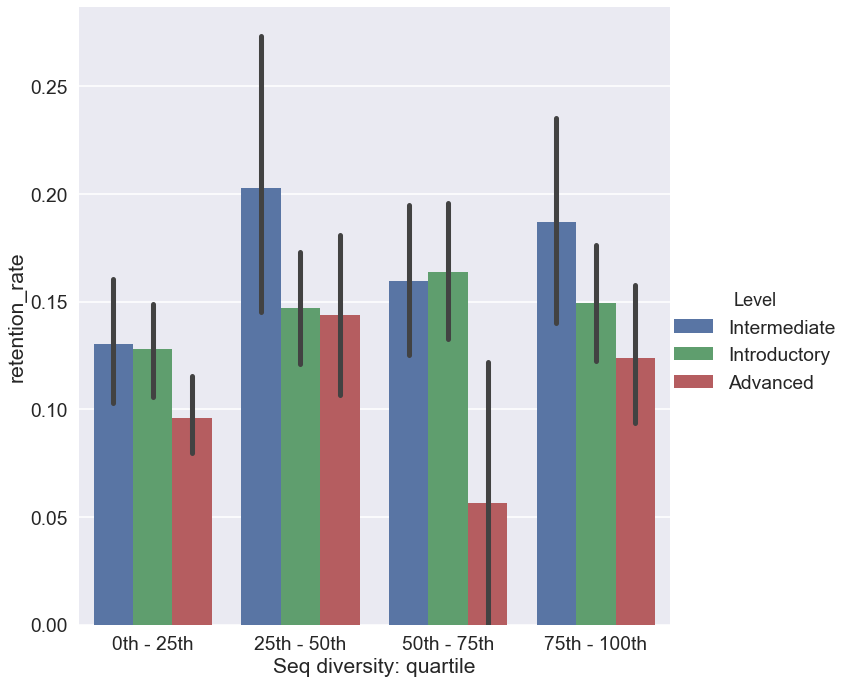

In [28]:
sns.factorplot(data = course_rubric_df[course_rubric_df.Subject.isin(stem_subjects)],
               x = 'Seq diversity: quartile', y = 'VTR',
              size = 10, kind = 'bar', order = order_list)
sns.factorplot(data = course_rubric_df[course_rubric_df.Subject.isin(stem_subjects)], 
               x = 'Seq diversity: quartile', y = 'retention_rate',
              size = 10, kind = 'bar', order = order_list)

sns.factorplot(data = course_rubric_df[course_rubric_df.Subject.isin(stem_subjects)], hue = 'Pacing',
               x = 'Seq diversity: quartile', y = 'VTR',
              size = 10, kind = 'bar', order = order_list)
sns.factorplot(data = course_rubric_df[course_rubric_df.Subject.isin(stem_subjects)], hue = 'Pacing',
               x = 'Seq diversity: quartile', y = 'retention_rate',
              size = 10, kind = 'bar', order = order_list)

sns.factorplot(data = course_rubric_df[course_rubric_df.Subject.isin(stem_subjects)], hue = 'Level',
               x = 'Seq diversity: quartile', y = 'VTR',
              size = 10, kind = 'bar', order = order_list)
sns.factorplot(data = course_rubric_df[course_rubric_df.Subject.isin(stem_subjects)], hue = 'Level',
               x = 'Seq diversity: quartile', y = 'retention_rate',
              size = 10, kind = 'bar', order = order_list)

### By level

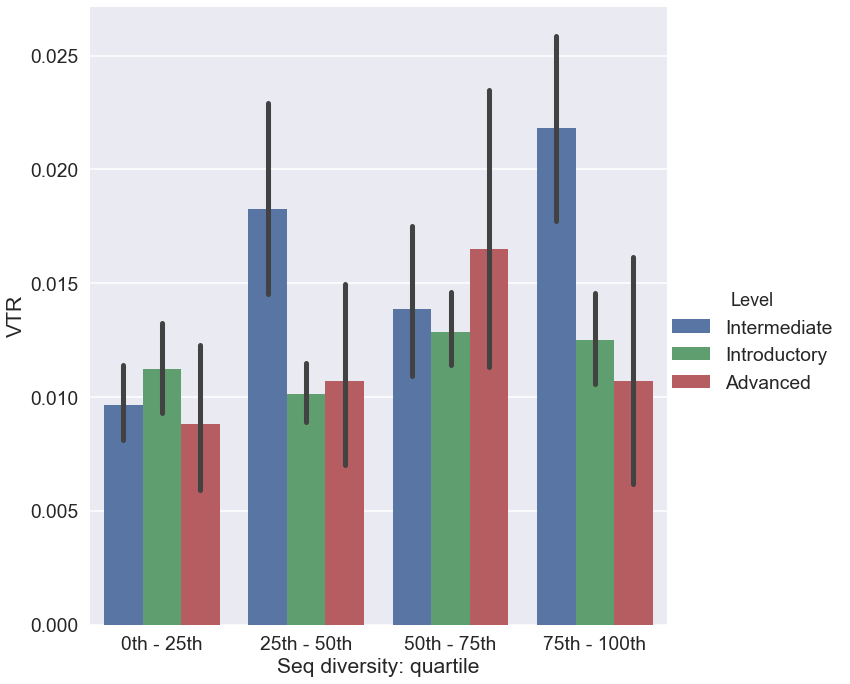

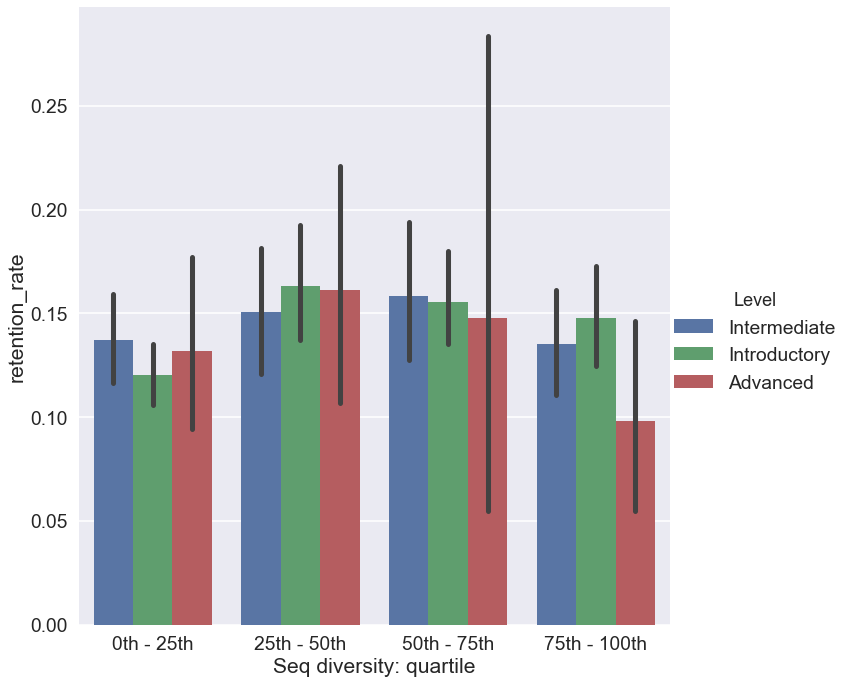

In [23]:
sns.factorplot(data = course_rubric_df, 
               x = 'Seq diversity: quartile', y = 'VTR',
               hue = 'Level', size = 10, kind = 'bar', order = order_list)
sns.factorplot(data = course_rubric_df, 
               x = 'Seq diversity: quartile', y = 'retention_rate',
               hue = 'Level', size = 10, kind = 'bar', order = order_list)

### By pacing

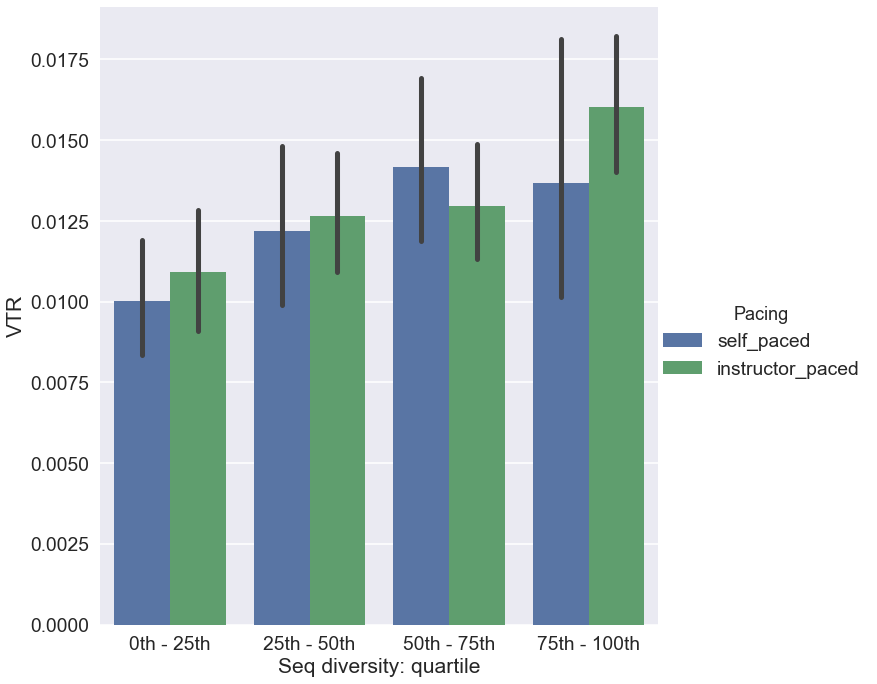

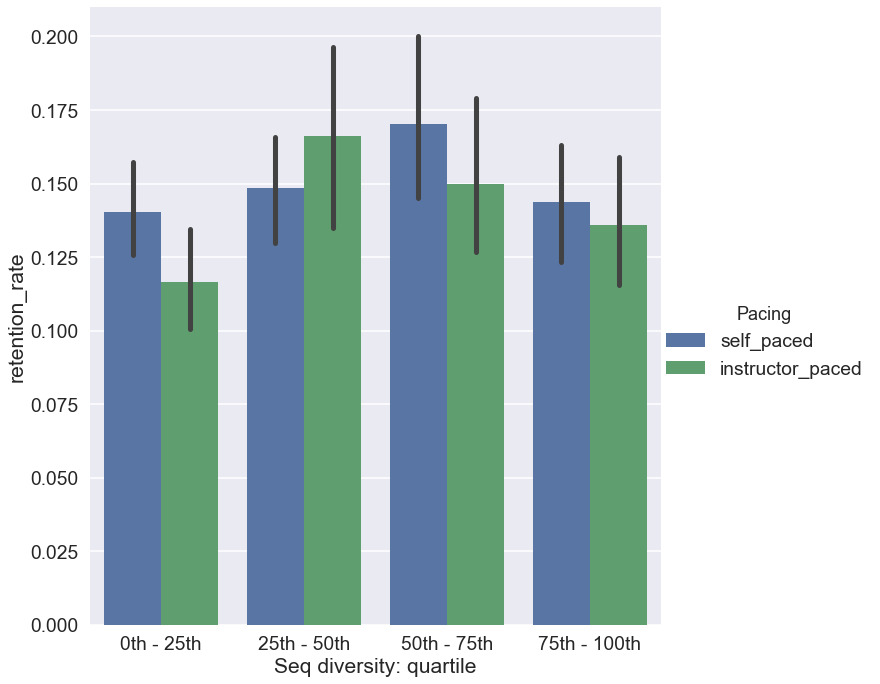

In [22]:
sns.factorplot(data = course_rubric_df, 
               x = 'Seq diversity: quartile', y = 'VTR',
               hue = 'Pacing', size = 10, kind = 'bar', order = order_list)
sns.factorplot(data = course_rubric_df, 
               x = 'Seq diversity: quartile', y = 'retention_rate',
               hue = 'Pacing', size = 10, kind = 'bar', order = order_list)